# **1 - Datenaufbereitung**
---

In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

!pip install geopandas
import geopandas as gpd

import imageio
from IPython.display import Image

In [ ]:
# Import Datensätze 
bildung_data = pd.read_csv('bildung_bezirke.csv', encoding = 'unicode_escape', decimal = ',', sep=';', skiprows=1)
einkommen_data = pd.read_csv('einkommen_bezirke.csv', encoding = 'unicode_escape', thousands = '.', sep=';', skiprows=1)
bevoelkerung_data = pd.read_csv('bevoelkerung_bezirke.csv', encoding = 'unicode_escape', sep=';', skiprows=1)

# Geodaten
district_map = gpd.read_file("BezirkMap")
district_map['PLZ'] = district_map['DISTRICT_C'].astype(int)

In [ ]:
# Spalten filtern
drop_bildung = ['NUTS', 'SUB_DISTRICT_CODE', 'REF_DATE']
df_bildung = bildung_data.drop(columns=drop_bildung)

drop_eink = ['NUTS', 'SUB_DISTRICT_CODE', 'REF_DATE', 'INC_MAL_VALUE', 'INC_FEM_VALUE']
df_einkommen = einkommen_data.drop(columns=drop_eink)

drop_bev = ['NUTS', 'SUB_DISTRICT_CODE', 'REF_DATE', 'POP_MAL', 'POP_FEM']
df_bevoelkerung = bevoelkerung_data.drop(columns=drop_bev)

In [ ]:
df_bildung.head()

DISTRICT_CODE  REF_YEAR  EDU_ALL  EDU_LEH  EDU_BMS  EDU_AHS  EDU_BHS  \
0          90000      2008    22.05    26.58    11.84     9.96     8.30   
1          90100      2008    11.68    13.02     8.88    16.10     7.45   
2          90200      2008    24.89    24.56     9.79    10.41     7.74   
3          90300      2008    19.95    20.73    10.15    12.17     8.41   
4          90400      2008    14.16    15.23     8.83    14.62     8.70   

   EDU_KOL  EDU_ACA  EDU_UNI  EDU_AKA  
0     1.02     2.42    17.84    20.26  
1     1.33     2.46    39.08    41.53  
2     0.91     2.50    19.21    21.71  
3     1.23     2.75    24.61    27.36  
4     1.27     2.97    34.22    37.19

In [ ]:
df_einkommen.head()

DISTRICT_CODE  REF_YEAR  INC_TOT_VALUE
0          90000      2002          18217
1          90100      2002          25463
2          90200      2002          16439
3          90300      2002          18701
4          90400      2002          20325

In [ ]:
df_bevoelkerung.head()

DISTRICT_CODE  REF_YEAR  POP_TOTAL
0          90100      1869      68079
1          90200      1869      68442
2          90300      1869      88678
3          90400      1869      55682
4          90500      1869      54010

In [ ]:
# Tabellen mergen
df_bezirke = df_bildung.merge(df_einkommen,on=['DISTRICT_CODE','REF_YEAR'])\
  .merge(df_bevoelkerung, on = ['DISTRICT_CODE','REF_YEAR'])


In [ ]:
# Daten filtern nach Jahr, 2010 - 2019
df_bezirke = df_bezirke[(df_bezirke['REF_YEAR'] >= 2010) & (df_bezirke['REF_YEAR'] <= 2019)]

# Vollständigkeit der Daten prüfen
print(df_bezirke.isnull().sum())
print(df_bezirke.isna().sum())

In [ ]:
# Dictionary Bezirke
bezirke = {1: 'Innere Stadt', 2: 'Leopoldstadt', 3: 'Landstraße', 4: 'Wieden', 5: 'Margareten', 6: 'Mariahilf', 7: 'Neubau', 8: 'Josefstadt', 9:'Alsergrund', 10: 'Favoriten', 11: 'Simmering', 12: 'Meidling', 13: 'Hietzing', 14: 'Penzing', 15: 'Rudolfsheim-Fünfhaus', 16: 'Ottakring', 17: 'Hernals', 18: 'Währing', 19: 'Döbling', 20: 'Brigittenau', 21: 'Floridsdorf', 22: 'Donaustadt', 23: 'Liesing'}
plz = {1: 1010, 2: 1020, 3: 1030, 4: 1040, 5: 1050, 6: 1060, 7: 1070, 8: 1080, 9: 1090, 10: 1100, 11: 1110, 12: 1120, 13: 1130, 14: 1140, 15: 1150, 16: 1160, 17: 1170, 18: 1180, 19: 1190, 20: 1200, 21: 1210, 22: 1220, 23: 1230}

# Bereinigung Bezirke
df_bezirke['BZN'] = (df_bezirke['DISTRICT_CODE'] - 90000)//100
df_bezirke = df_bezirke[df_bezirke['BZN']!=0]

df_bezirke['BEZIRK_NAME'] = df_bezirke.apply(lambda row: bezirke.get(row['BZN']), axis=1)
df_bezirke['PLZ'] = df_bezirke.apply(lambda row: plz.get(row['BZN']), axis=1)
df_bezirke.head()

DISTRICT_CODE  REF_YEAR  EDU_ALL  EDU_LEH  EDU_BMS  EDU_AHS  EDU_BHS  \
46          90100      2010    11.65    12.32     8.35    16.15     7.19   
47          90200      2010    25.91    22.92     9.08    10.38     7.39   
48          90300      2010    20.34    19.38     9.67    12.04     8.30   
49          90400      2010    14.73    14.35     7.99    14.40     8.84   
50          90500      2010    25.58    20.25     8.65    11.32     8.02   

    EDU_KOL  EDU_ACA  EDU_UNI  EDU_AKA  INC_TOT_VALUE  POP_TOTAL  BZN  \
46     1.23     2.47    40.63    43.11          33419      16525    1   
47     0.96     2.31    21.05    23.37          18998      94735    2   
48     1.24     2.76    26.27    29.03          22166      83061    3   
49     1.28     2.83    35.58    38.41          24069      30331    4   
50     1.11     2.28    22.78    25.06          18659      52354    5   

     BEZIRK_NAME   PLZ  
46  Innere Stadt  1010  
47  Leopoldstadt  1020  
48    Landstraße  1030  
49        Wieden  1040  
50    Margareten  1050

In [ ]:
# Tabelle für Wien gesamt
df_bildung_wien = df_bildung[df_bildung['DISTRICT_CODE']==90000]
df_einkommen_wien = df_einkommen[df_einkommen['DISTRICT_CODE']==90000]

df_wien = df_bildung_wien.merge(df_einkommen_wien,on=['REF_YEAR'])
df_wien = df_wien.drop(columns=['DISTRICT_CODE_x', 'DISTRICT_CODE_y'])
df_wien = df_wien[(df_wien['REF_YEAR'] >= 2010) & (df_wien['REF_YEAR'] <= 2019)]

In [ ]:
column_rename_map={"DISTRICT_CODE": "Bezirkscode",
                                        "REF_YEAR": "Jahr",
                                        "EDU_ALL": "Pflichtschule",
                                        "EDU_LEH": "Lehre",
                                        "EDU_BMS": "BMS",
                                        "EDU_AHS": "AHS",
                                        "EDU_BHS": "BHS",
                                        "EDU_KOL": "Kolleg",
                                        "EDU_ACA": "Uni-Lehrgang",
                                        "EDU_UNI": "Hochschule",
                                        "EDU_AKA": "Anteil AkademikerInnen",
                                        "INC_TOT_VALUE": "Nettoeinkommen/Jahr",
                                        "POP_TOTAL": "Bevölkerung",
                                        "BEZIRK_NAME": "Bezirk"}


In [ ]:
df_wien = df_wien.rename(columns=column_rename_map)
df_bezirke= df_bezirke.rename(columns=column_rename_map)

In [ ]:
df_bezirke.head()

Bezirkscode  Jahr  Pflichtschule  Lehre   BMS    AHS   BHS  Kolleg  \
46        90100  2010          11.65  12.32  8.35  16.15  7.19    1.23   
47        90200  2010          25.91  22.92  9.08  10.38  7.39    0.96   
48        90300  2010          20.34  19.38  9.67  12.04  8.30    1.24   
49        90400  2010          14.73  14.35  7.99  14.40  8.84    1.28   
50        90500  2010          25.58  20.25  8.65  11.32  8.02    1.11   

    Uni-Lehrgang  Hochschule  Anteil AkademikerInnen  Nettoeinkommen/Jahr  \
46          2.47       40.63                   43.11                33419   
47          2.31       21.05                   23.37                18998   
48          2.76       26.27                   29.03                22166   
49          2.83       35.58                   38.41                24069   
50          2.28       22.78                   25.06                18659   

    Bevölkerung  BZN        Bezirk   PLZ  
46        16525    1  Innere Stadt  1010  
47        94735    2  Leopoldstadt  1020  
48        83061    3    Landstraße  1030  
49        30331    4        Wieden  1040  
50        52354    5    Margareten  1050

In [ ]:
df_wien.head()

Jahr  Pflichtschule  Lehre    BMS    AHS   BHS  Kolleg  Uni-Lehrgang  \
2  2010          23.04  25.18  11.28  10.00  8.12    1.02          2.34   
3  2011          23.17  24.67  11.12   9.90  8.10    0.98          2.35   
4  2012          23.26  24.01  10.89   9.79  8.13    0.99          2.31   
5  2013          23.77  23.22  10.58   9.73  7.95    0.99          2.24   
6  2014          24.06  22.53  10.37   9.74  7.96    1.00          2.19   

   Hochschule  Anteil AkademikerInnen  Nettoeinkommen/Jahr  
2       19.01                   21.36                20685  
3       19.73                   22.07                20594  
4       20.61                   22.93                20890  
5       21.53                   23.77                20956  
6       22.15                   24.34                21143

# **2 - Exploration & Analyse**
---

### Beschreibung der Datensätze
---
Der Datensatz `df_bezirke` besteht aus 230 Einträgen und 14 Spalten. Von den 14 Spalten haben 9 den Datenytyp `float`, 4 Spalten den Typ `int` und 1 Spalte den Datentyp `object`. In der statistischen Übersicht können außerdem Mittelwert, Standardabweichung sowie Minimum- und Maximumwert abgelesen werden, welche jedoch über den gegebenen Zeitraum wenig Aussagekraft zulassen. Die min/max Werte von `PLZ` und `Jahr` bestätigen die erfolgreiche Selektion der Daten.

Der Datensatz `df_wien` besteht aus 10 Einträgen (für die Jahre 2010-2019) und 11 Spalten. Hier fällt die Unterteilung nach Bezirken weg und betrachtet werden die Gesamtwerte der Stadt Wien. Die Spalten bestehen daher überwiegend aus `float` sowie zwei `int` Datentypen. In diesem Datensatz können den statistischen Werten bereits Informationen entnommen werden. So haben sich etwa die Werte im Durchschnitt über die letzten 10 Jahre in den Bildungsspalten `Pflichtschule` und `Lehre` kaum verändert, während der `Anteil AkademikerInnen` eine breite Streuung aufweist.

In [ ]:
# Bezirke 2010-2019
print(df_bezirke.shape)
print(df_bezirke.info())
print(df_bezirke.describe())

(230, 16)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 46 to 275
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Bezirkscode             230 non-null    int64  
 1   Jahr                    230 non-null    int64  
 2   Pflichtschule           230 non-null    float64
 3   Lehre                   230 non-null    float64
 4   BMS                     230 non-null    float64
 5   AHS                     230 non-null    float64
 6   BHS                     230 non-null    float64
 7   Kolleg                  230 non-null    float64
 8   Uni-Lehrgang            230 non-null    float64
 9   Hochschule              230 non-null    float64
 10  Anteil AkademikerInnen  230 non-null    float64
 11  Nettoeinkommen/Jahr     230 non-null    int64  
 12  Bevölkerung             230 non-null    int64  
 13  BZN                     230 non-null    int64  
 14  Bezirk                  230 non

In [ ]:
# Stadt Wien 2010-2019
print(df_wien.shape)
print(df_wien.info())
print(df_wien.describe())

(10, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 2 to 11
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Jahr                    10 non-null     int64  
 1   Pflichtschule           10 non-null     float64
 2   Lehre                   10 non-null     float64
 3   BMS                     10 non-null     float64
 4   AHS                     10 non-null     float64
 5   BHS                     10 non-null     float64
 6   Kolleg                  10 non-null     float64
 7   Uni-Lehrgang            10 non-null     float64
 8   Hochschule              10 non-null     float64
 9   Anteil AkademikerInnen  10 non-null     float64
 10  Nettoeinkommen/Jahr     10 non-null     int64  
dtypes: float64(9), int64(2)
memory usage: 960.0 bytes
None
             Jahr  Pflichtschule     Lehre        BMS        AHS        BHS  \
count    10.00000      10.000000  10.00000  10.000000  10.00

### Auswertung Gesamteinkommen der Bezirke
---

Am Balkendiagramm kann man ablesen, dass der 22. Bezirk, der 10. Bezirk und der 21. Bezirk das höchste Gesamteinkommen haben. Der Rest der Bezirke hat hier ein deutlich geringeres Gesamteinkommen. Interessant ist außerdem, dass der 1. Bezirk trotz seines hohen Einkommens pro Person hier den letzten Platz macht. Das liegt an der geringen Anzahl der Bewohner.

In [ ]:
# Berechnung des absoluten Gesamteinkommens der Bezirke
df_bezirke_absolut = df_bezirke.copy()
df_bezirke_absolut['Gesamteinkommen'] = df_bezirke_absolut['Nettoeinkommen/Jahr'] * df_bezirke_absolut['Bevölkerung']

# neues Dataframe für das gesamteinkommen der bezirke im jahr 2019
df_bezirke_2019 = df_bezirke_absolut[(df_bezirke_absolut['Jahr'] == 2019)]
df_bezirke_2019_GE = df_bezirke_2019[['PLZ','Gesamteinkommen']]
df_bezirke_2019_GE.head()


PLZ  Gesamteinkommen
253  1010        563649502
254  1020       2432123550
255  1030       2362525495
256  1040        890949455
257  1050       1189311255

Mittelwert: 1948439585.91
Median: 1716891696.0


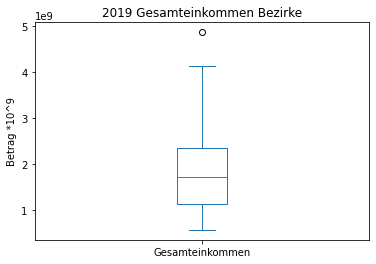

In [ ]:
# Berechnung Mittelwert des Gesamteinkommens
bezirke_2019_GE_mean = np.mean(df_bezirke_2019_GE['Gesamteinkommen'])
bezirke_2019_GE_mean_rounded = bezirke_2019_GE_mean.round(2)
print("Mittelwert:", bezirke_2019_GE_mean_rounded)

# Median des Gesamteinkommens
bezirke_2019_GE_median = np.median(df_bezirke_2019_GE['Gesamteinkommen'])
bezirke_2019_GE_median_rounded = bezirke_2019_GE_median.round(2)
print("Median:", bezirke_2019_GE_median_rounded)

# Boxplot Gesamteinkommen
df_bezirke_2019_GE['Gesamteinkommen'].plot(kind='box')
plt.title("2019 Gesamteinkommen Bezirke")
plt.ylabel("Betrag *10^9")
plt.show()

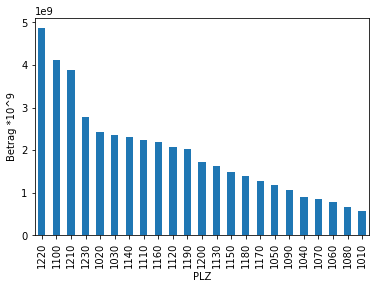

In [ ]:
# Balkendiagramm nach Gesamteinkommen absteigend
df_bezirke_2019_GE_sorted = df_bezirke_2019_GE.sort_values(by='Gesamteinkommen',ascending=False)
df_bezirke_2019_GE_sorted = df_bezirke_2019_GE_sorted.set_index('PLZ')
df_bezirke_2019_GE_sorted['Gesamteinkommen'].plot(kind='bar')
plt.ylabel("Betrag *10^9")
plt.show()

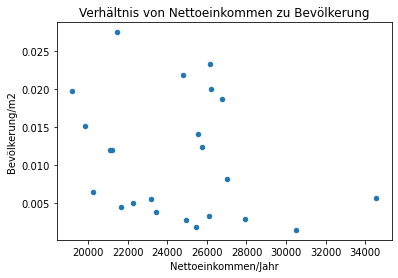

In [ ]:
# Scatterplot

# Bevölkerung/m2
df_bezirke_2019_merge = df_bezirke_2019.merge(district_map, on="PLZ")
df_bezirke_2019_merge['Bevölkerung/m2'] = df_bezirke_2019_merge['Bevölkerung']/df_bezirke_2019_merge['FLAECHE']

df_bezirke_2019_merge.plot(kind='scatter',x='Nettoeinkommen/Jahr',y='Bevölkerung/m2')
plt.title("Verhältnis von Nettoeinkommen zu Bevölkerung")
plt.show()

### Einkommensverlauf
Das Liniendiagramm zum durchschnittlichen nominalen Jahresnettoeinkommen nach Bezirken für die Jahre 2010 bis 2019 zeigt, dass sich die Wiener Bezirke in drei Einkommenscluster gruppieren: "Top 3" (Bezirke 1, 13, 19), "überdurchschnittlich" (Bezirke 4, 8, 14, 9, 22, 6, 3, 7), sowie "unterdurchschnittlich" (Bezirke 15, 20, 5, 16, 2, 10, 11, 12, 17, 21) - der zwischen zweit- und letztgenannter Gruppe liegende Einkommensdurchschnitt über alle Bezirke ist im Diagramm nicht dargestellt. Diese Clusterstruktur bleibt im gesamten dargestellten Zeitraum stabil, wobei die Nominaleinkommen in allen Bezirken nach vorheriger Stagnation ab 2015 einen Aufwärtstrend aufweisen. Der besonders markante Sprung von 2015 auf 2016 ist laut aktuellem Einkommensbericht auf eine Änderung der Einkommensbesteuerung zurückzuführen - wie das Diagramm zeigt, haben davon die hohen Einkommen im 1. Bezirk am stärksten profitiert. Am Abstand innerhalb und zwischen den Einkommensgruppen ändert sich im dargestellten Zeitraum nur wenig, wobei die "Top 3" gegen sein Ende etwas enger zusammenrücken. 

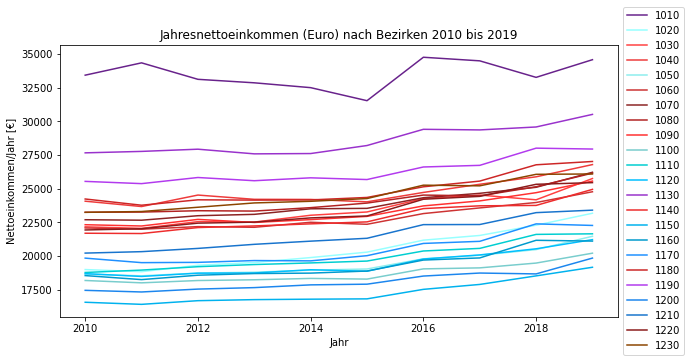

In [ ]:
# Zeitreihe Einkommen

df_bezirke_einkommen_ts = df_bezirke.pivot(index="Jahr", columns="PLZ", values="Nettoeinkommen/Jahr")


colors = ['#68228B', '#97FFFF', '#FF4040', '#EE3B3B', '#8DEEEE', '#CD3333', '#8B2323', '#B22222', '#FF3030', '#79CDCD', '#00CED1', '#00BFFF', 
          '#9932CC', '#EE2C2C', '#00B2EE', '#009ACD', '#1E90FF', '#CD2626', '#B23AEE', '#1C86EE', '#1874CD', '#8B1A1A', '#8B4500'                     
           
            ]

df_bezirke_einkommen_ts.plot(legend = False, figsize=(10,5), title = 'Jahresnettoeinkommen (Euro) nach Bezirken 2010 bis 2019', color = colors) 
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Nettoeinkommen/Jahr [€]")
plt.show()

In [ ]:
# Bereinigung df_einkommen

column_rename_map1={"DISTRICT_CODE": "Bezirkscode",
                                        "REF_YEAR": "Jahr",
                                        "INC_TOT_VALUE": "Jahresnettoeinkommen"                                       
                                        
                                        }

df_einkommen = df_einkommen.rename(columns=column_rename_map)

df_einkommen = df_einkommen[(df_einkommen['Bezirkscode'] > 90000)]


bezirke = {1: 'Innere Stadt', 2: 'Leopoldstadt', 3: 'Landstraße', 4: 'Wieden', 5: 'Margareten', 6: 'Mariahilf', 7: 'Neubau', 8: 'Josefstadt', 9:'Alsergrund', 10: 'Favoriten', 11: 'Simmering', 12: 'Meidling', 13: 'Hietzing', 14: 'Penzing', 15: 'Rudolfsheim-Fünfhaus', 16: 'Ottakring', 17: 'Hernals', 18: 'Währing', 19: 'Döbling', 20: 'Brigittenau', 21: 'Floridsdorf', 22: 'Donaustadt', 23: 'Liesing'}
plz = {1: 1010, 2: 1020, 3: 1030, 4: 1040, 5: 1050, 6: 1060, 7: 1070, 8: 1080, 9: 1090, 10: 1100, 11: 1110, 12: 1120, 13: 1130, 14: 1140, 15: 1150, 16: 1160, 17: 1170, 18: 1180, 19: 1190, 20: 1200, 21: 1210, 22: 1220, 23: 1230}

# Bereinigung Bezirke
df_einkommen['BZN'] = (df_einkommen['Bezirkscode'] - 90000)//100
df_einkommen = df_einkommen[df_einkommen['BZN']!=0]

df_einkommen['PLZ'] = df_einkommen.apply(lambda row: plz.get(row['BZN']), axis=1)


# df_einkommen = df_einkommen.merge(df_bezirke[['Bezirkscode', 'PLZ']], on = 'Bezirkscode')


### Einkommensverlauf, längere Zeitreihe

Da für das durchschnittliche Jahresnettoeinkommen nach Bezirken Daten für einen längeren Zeitraum verfügbar sind als für den bezirksspezifischen Bildungsstand (2002 bis 2020), wurde die Einkommensentwicklung auch für dieses größere Zeitfenster analysiert. Die erwähnte dreiteilige Clusterstruktur ("Top 3", 10 Bezirke über dem wienweiten Einkommensdurchschnitt, 10 Bezirke darunter) ist auch über den längeren Zeitraum durchgehend beobachtbar, wobei sich die Einkommen in den überdurchschnittlichen Bezirken über den Beobachtungszeitraum eher aneinander angeglichen haben, während sich die unterdurchschnittlichen Einkommen tendentiell auseinanderentwickelt haben. 


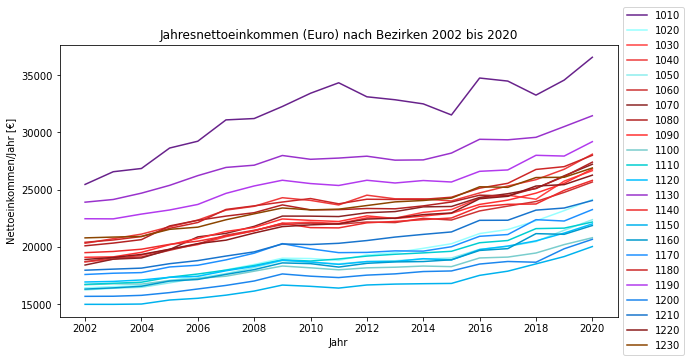

In [ ]:
# Zeitreihe Einkommen ab 2002

df_einkommen_ts = df_einkommen.pivot(index="Jahr", columns="PLZ", values="Nettoeinkommen/Jahr")

colors = ['#68228B', '#97FFFF', '#FF4040', '#EE3B3B', '#8DEEEE', '#CD3333', '#8B2323', '#B22222', '#FF3030', '#79CDCD', '#00CED1', '#00BFFF', 
          '#9932CC', '#EE2C2C', '#00B2EE', '#009ACD', '#1E90FF', '#CD2626', '#B23AEE', '#1C86EE', '#1874CD', '#8B1A1A', '#8B4500'                     
           
            ]

df_einkommen_ts.plot(legend = False, figsize=(10,5), title = 'Jahresnettoeinkommen (Euro) nach Bezirken 2002 bis 2020', \
                     xticks = [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], color = colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Nettoeinkommen/Jahr [€]")
plt.show()

### Einkommensverlauf inflationsbereinigt, längere Zeitreihe
Um abschätzen zu können, wie sich die Jahresnettoeinkommen in Relation zur Inflation laut Verbraucherpreisindex entwickelt haben, wurden die Einkommensdaten zur Basis 2002 inflationsbereinigt. Das darauf beruhende Liniendiagramm zeigt dieselbe Clusterstruktur wie die Diagramme zu den Nominaleinkommen. Zugleich wird sichtbar, dass die inflationsbereinigten Einkommen sich im beobachteten Zeitraum mit Ausnahme der Jahre ab 2015 fast durchwegs stagnierend oder rückläufig entwickelt haben. Insgesamt bleiben die durchschnittlichen Jahresnettoeinkünfte 2020 in den meisten Bezirken unter dem Niveau von 2002 oder erreichen dieses knapp. Zu berücksichtigen ist bei der Interpretation dieser Ergebnisse, dass Änderungen im Einkommensdurchschnitt nicht nur mit geänderten Stundenlöhnen, sondern auch mit Änderungen in der Zusammensetzung und den Tätigkeitsprofilen der jeweiligen Erwerbsbevölkerung in Zusammenhang stehen können (z.B. Erhöhung von Teilzeitbeschäftigung, geringfügig Erwerbstätige etc.).  


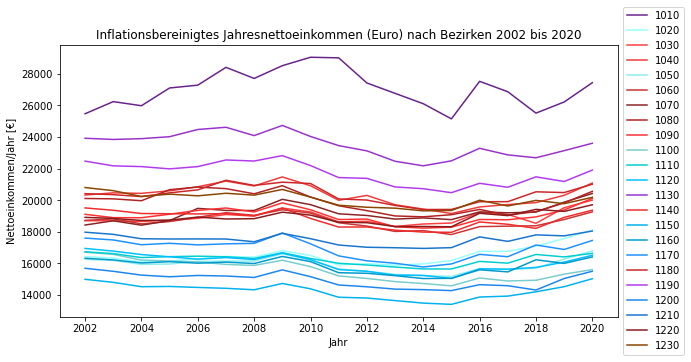

In [ ]:
# Inflationsbereinigtes Einkommen ab 2002

vpi_ind_2002_dict = {2002: 1, 2003: 1.013, 2004: 1.034, 2005: 1.057, 2006: 1.072, 2007: 1.095, 2008: 1.127, 2009: 1.132, 2010: 1.151, 2011: 1.184, \
                           2012: 1.208, 2013: 1.228, 2014: 1.245, 2015: 1.254, 2016: 1.263, 2017: 1.284, 2018: 1.304, 2019: 1.319, 2020: 1.333}

df_einkommen['IND_INFL'] = df_einkommen.apply(lambda row: vpi_ind_2002_dict.get(row['Jahr']), axis=1)

df_einkommen['Jahreseinkommen_infl'] = df_einkommen['Nettoeinkommen/Jahr'] / df_einkommen['IND_INFL']

df_einkommen_ts = df_einkommen.pivot(index="Jahr", columns="PLZ", values="Jahreseinkommen_infl")

colors = ['#68228B', '#97FFFF', '#FF4040', '#EE3B3B', '#8DEEEE', '#CD3333', '#8B2323', '#B22222', '#FF3030', '#79CDCD', '#00CED1', '#00BFFF', 
          '#9932CC', '#EE2C2C', '#00B2EE', '#009ACD', '#1E90FF', '#CD2626', '#B23AEE', '#1C86EE', '#1874CD', '#8B1A1A', '#8B4500'                     
           
            ]

df_einkommen_ts.plot(legend = False, figsize=(10,5), title = 'Inflationsbereinigtes Jahresnettoeinkommen (Euro) nach Bezirken 2002 bis 2020', \
                     xticks = [2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020], color = colors)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Nettoeinkommen/Jahr [€]")
plt.show()

### Absolutwerte der Bildungskennzahlen
---

In der folgenden Tabelle findet sich die Anzahl der Einwohner pro Bezirk nach Bildungsstand aus den Jahren 2010-2019.




In [ ]:
## --- Absolutwerte der Bildungstabelle --- ##

# Berechnung der absoluten Bildungszahlen nach Einwohner
ListeEDU = ['Pflichtschule', 'Lehre', 'BMS', 'AHS', 'BHS', 'Kolleg', 'Uni-Lehrgang', 'Hochschule', 'Anteil AkademikerInnen']

for V in ListeEDU:
  df_bezirke_absolut[V] = round(df_bezirke[V]*df_bezirke['Bevölkerung']/100).astype(int)

df_bezirke_absolut.head()

Bezirkscode  Jahr  Pflichtschule  Lehre   BMS    AHS   BHS  Kolleg  \
46        90100  2010           1925   2036  1380   2669  1188     203   
47        90200  2010          24546  21713  8602   9833  7001     909   
48        90300  2010          16895  16097  8032  10001  6894    1030   
49        90400  2010           4468   4352  2423   4368  2681     388   
50        90500  2010          13392  10602  4529   5926  4199     581   

    Uni-Lehrgang  Hochschule  Anteil AkademikerInnen  Nettoeinkommen/Jahr  \
46           408        6714                    7124                33419   
47          2188       19942                   22140                18998   
48          2292       21820                   24113                22166   
49           858       10792                   11650                24069   
50          1194       11926                   13120                18659   

    Bevölkerung  BZN        Bezirk   PLZ  
46        16525    1  Innere Stadt  1010  
47        94735    2  Leopoldstadt  1020  
48        83061    3    Landstraße  1030  
49        30331    4        Wieden  1040  
50        52354    5    Margareten  1050

### Korrelation Bildung und Einkommen
---
Für die Analyse der Korrelation von Bildungsstand und Einkommen wurde der Zusammenhang zwischen Anteil der AkademikerInnen in Prozent und dem durchschnittlichen Nettoeinkommen pro Jahr mittels linearem Regressionsmodell untersucht. Mit einem Korrelationskoeffizienten von 0.687 kann von einem mittleren Zusammenhang gespochen werden. Es kann daher davon ausgegangen werden, dass ein höherer Bildungsgrad mit höherem Einkommen positiv korreliert. Zu beachten ist, dass hier der Bezirk 1.Innere Stadt als Ausreißer stark in die Korrelation wiegt. 

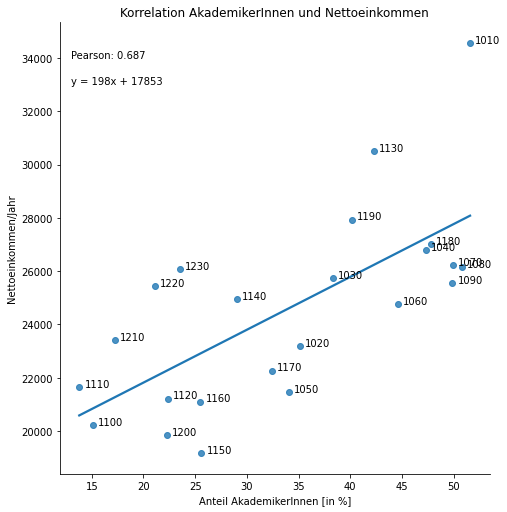

In [ ]:
## --- Korrelationsmatrix Bildung/Einkommen --- ##

# Datensatz filtern
bezirke_2019 = df_bezirke[df_bezirke['Jahr'] == 2019]
bezirke_2019_AA = bezirke_2019[['PLZ', 'Anteil AkademikerInnen', 'Nettoeinkommen/Jahr']]

# Berechnung des Korrelationskeoffizienten
corr_matrix_AA = bezirke_2019_AA.corr()
koef_AA = round(corr_matrix_AA.iloc[1][2],3)

# Korrelationsplot
corr_plot_AA = sns.lmplot(data=bezirke_2019_AA, x='Anteil AkademikerInnen', y="Nettoeinkommen/Jahr",  height=7, fit_reg=True, ci=None)

plt.xlabel("Anteil AkademikerInnen [in %]")
plt.title("Korrelation AkademikerInnen und Nettoeinkommen")

# Correlation Model
x_AA = np.array(bezirke_2019_AA['Anteil AkademikerInnen'])
y_AA = np.array(bezirke_2019_AA["Nettoeinkommen/Jahr"])
b_AA, a_AA = np.polyfit(x_AA, y_AA, deg=1)

# Info Dump
plt.text(13,34000, "Pearson: {}".format(koef_AA))
plt.text(13, 33000, "y = {}x + {}".format(round(b_AA), round(a_AA)))

# Variablen Beschriftung
plz = list(bezirke_2019_AA['PLZ'])
akademiker = list(bezirke_2019_AA['Anteil AkademikerInnen'])
einkommen = list(bezirke_2019_AA["Nettoeinkommen/Jahr"])

for i, district in enumerate(plz):
  plt.text(akademiker[i]+0.5, einkommen[i], district)

plt.show(corr_plot_AA)

In [ ]:
# Kategorisierung Bildungsstand
bildungsjahre = df_bezirke_absolut[df_bezirke_absolut['Jahr'] == 2019]
ListeBS = ['PLZ','Bezirk', 'Pflichtschule', 'Lehre', 'BMS', 'AHS', 'BHS', 'Kolleg', 'Uni-Lehrgang', 'Hochschule', 'Bevölkerung', 'Nettoeinkommen/Jahr']
dict_schuljahre = {"Pflichtschule": 9, "Lehre": 12, 'AHS': 12, 'BMS':12, 'BHS':13, 'Kolleg': 14, 'Uni-Lehrgang':14, 'Hochschule':16}
bildungsjahre = bildungsjahre[ListeBS]

# Berechnung der Durschnittsjahre
bildungsjahre['Durchschnitt Jahre'] = bildungsjahre.apply(lambda row: sum([dict_schuljahre[k]*row[k] for k in dict_schuljahre.keys()])/row['Bevölkerung'] , axis=1)

bildungsjahre.head()

PLZ        Bezirk  Pflichtschule  Lehre   BMS    AHS   BHS  Kolleg  \
253  1010  Innere Stadt           1394   1500  1153   2521  1148     179   
254  1020  Leopoldstadt          20958  18712  7860  12426  7126    1018   
255  1030    Landstraße          14844  14771  7312  11560  7000    1119   
256  1040        Wieden           4041   3968  2096   4700  2338     386   
257  1050    Margareten          11630   9242  3834   7308  3890     637   

     Uni-Lehrgang  Hochschule  Bevölkerung  Nettoeinkommen/Jahr  \
253           329        8081        16306                34567   
254          1816       35020       104946                23175   
255          1844       33294        91745                25751   
256           635       15098        33263                26785   
257           920       17946        55407                21465   

     Durchschnitt Jahre  
253           13.857844  
254           12.856440  
255           13.106960  
256           13.582449  
257           12.792283

### Korrelation Bildungsstand in Jahren
---

Für die weitere Analyse wurden die durschnittlichen Bildungsjahre nach Bevölkerung berechnet und mit einer polynomialen Regressionskurve 2ter Ordnung angepasst.

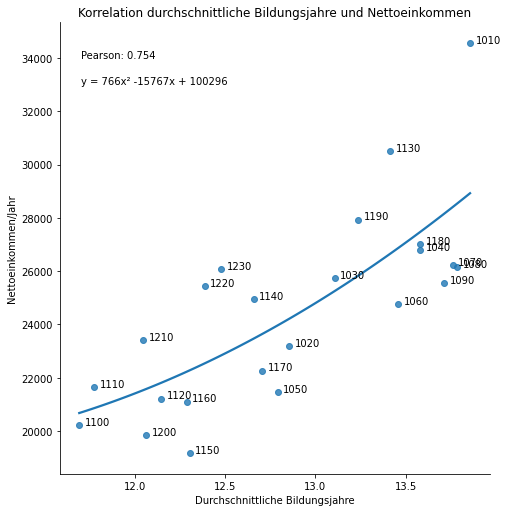

In [ ]:
# Korrelations-Tabelle
bildungsjahre_corr = bildungsjahre[['PLZ','Durchschnitt Jahre', 'Nettoeinkommen/Jahr']]

# Berechnung des Korrelationskeoffizienten
corr_matrix_jahre = bildungsjahre_corr.corr()
koef_jahre = round(corr_matrix_jahre.iloc[1][2],3)

# Korrelationsplot
corr_plot_jahre = sns.lmplot(data=bildungsjahre_corr, x='Durchschnitt Jahre', y="Nettoeinkommen/Jahr", height=7, fit_reg=True, ci=None, order=2)

plt.xlabel("Durchschnittliche Bildungsjahre")
plt.title("Korrelation durchschnittliche Bildungsjahre und Nettoeinkommen")

# Polynomal Correlation
x_BJ = np.array(bildungsjahre_corr['Durchschnitt Jahre'])
y_BJ = np.array(bildungsjahre_corr["Nettoeinkommen/Jahr"])

a_BJ, b_BJ, c_BJ = np.polyfit(x_BJ,y_BJ,2)

# Define variables for chart
plz = list(bildungsjahre_corr['PLZ'])
jahre = list(bildungsjahre_corr['Durchschnitt Jahre'])
einkommen = list(bildungsjahre_corr["Nettoeinkommen/Jahr"])

for i, district in enumerate(plz):
  plt.text(jahre[i]+0.03, einkommen[i], district)


# Info Dump
plt.text(11.7,34000, "Pearson: {}".format(koef_jahre))
plt.text(11.7, 33000, "y = {}x² {}x + {}".format(round(a_BJ), round(b_BJ), round(c_BJ)))

plt.show(corr_plot_jahre)

### Bildungsverteilung nach Bezirken 2019
---

Die Bildungsverteilung zeigt den prozentuellen Anteil der Bildungsniveaus pro Bezirk auf. Hier zeichnen sich 10. und 11. Bezirk deutlich als nichtakademische Regionen ab, während vor allem die Innenstadt ein hohes Bildunsniveau aufweist. In der Aufschlüsselung nach AkademikerInnenanteil in Prozent wird dieser Umstand weiter verdeutlicht. Hier bilden 1., 7.-9. und 18. die Bezirke mit dem höchsten AkademikerInnenanteil.

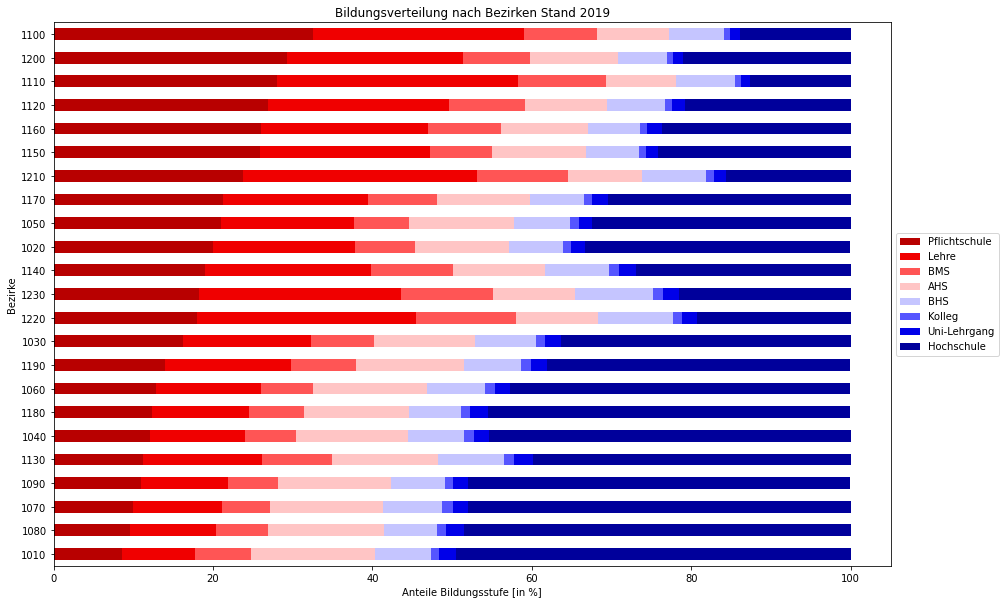

In [ ]:
# Datensatz filtern & sortieren
bezirke_2019 = df_bezirke[df_bezirke['Jahr'] == 2019]
bezirke_2019_BV = bezirke_2019.drop(columns=['Anteil AkademikerInnen', 'Nettoeinkommen/Jahr', 'Bevölkerung', 'Jahr', 'Bezirk', 'BZN', 'Bezirkscode'])

bezirke_2019_BV = bezirke_2019_BV.set_index('PLZ')
bezirke_2019_BV = bezirke_2019_BV.sort_values('Pflichtschule')

# Stacked Barplot nach Bezirk
bezirke_2019_BV.plot.barh(stacked=True, figsize=(15,10), color=sns.color_palette('seismic_r', 8))
plt.title('Bildungsverteilung nach Bezirken Stand 2019')
plt.xlabel('Anteile Bildungsstufe [in %]')
plt.ylabel('Bezirke')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

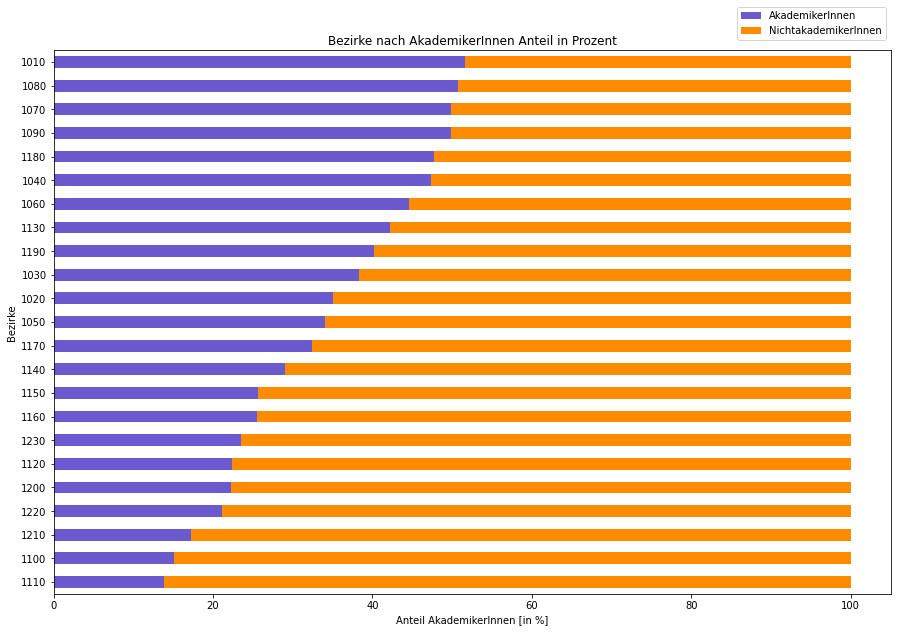

In [ ]:
# Datensatz Cleaning
bezirke_2019_AA = bezirke_2019[['PLZ','Anteil AkademikerInnen']].copy()

bezirke_2019_AA['Anteil NichtakademikerInnen'] = bezirke_2019_AA.apply(lambda row: 100-row['Anteil AkademikerInnen'], axis=1)
bezirke_2019_AA = bezirke_2019_AA.set_index('PLZ')
bezirke_2019_AA = bezirke_2019_AA.sort_values('Anteil AkademikerInnen')


# Stacked Barplot nach Anteil AkademikerInnen
bezirke_2019_AA.plot.barh(stacked=True, figsize=(15,10), color=['slateblue','darkorange'])
plt.xlabel('Anteil AkademikerInnen [in %]')
plt.ylabel('Bezirke')
plt.title('Bezirke nach AkademikerInnen Anteil in Prozent')
plt.legend(labels=['AkademikerInnen', 'NichtakademikerInnen'],bbox_to_anchor=(0,1.01,1,0.2),loc="lower right")
plt.show()

## **3 - Geomapping**
---

### Bezirksanalyse
---

In dieser Analyse werden Nettoeinkommen und AkademikerInnen-Anteil aus dem Jahr 2019 in einer Bezirkskarte dargestellt. 

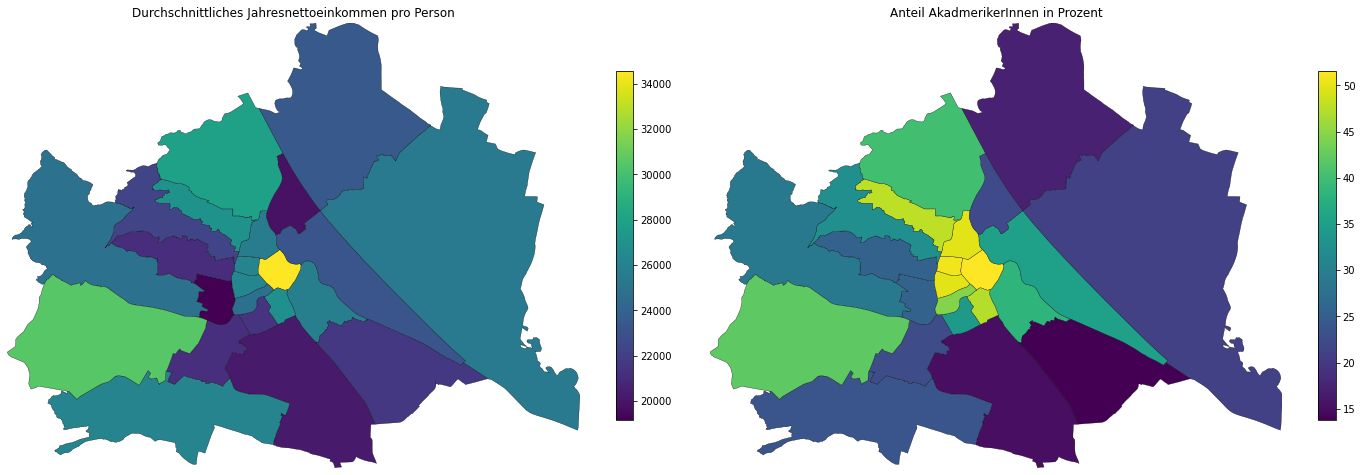

In [ ]:
# Datenaufbereitung
district_map = district_map.merge(bezirke_2019, on=['PLZ'])

# Subplots Bezirkmaps
vmin_inc=bezirke_2019['Nettoeinkommen/Jahr'].min()
vmax_inc=bezirke_2019['Nettoeinkommen/Jahr'].max()

vmin_acad = bezirke_2019['Anteil AkademikerInnen'].min()
vmax_acad = bezirke_2019['Anteil AkademikerInnen'].max()

fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))
ax1.set_title('Durchschnittliches Jahresnettoeinkommen pro Person 2019')
ax2.set_title(('Anteil AkadmerikerInnen in Prozent 2019'))
minx, miny, maxx, maxy = district_map.total_bounds
ax1.set_xlim(minx, maxx)
ax1.set_ylim(miny, maxy)
ax2.set_xlim(minx, maxx)
ax2.set_ylim(miny, maxy)
district_map.plot('Nettoeinkommen/Jahr', ax=ax1, legend=True, legend_kwds={'shrink': 0.5}, edgecolor='black', linewidth=0.3, norm=plt.Normalize(vmin=vmin_inc, vmax=vmax_inc)).set_axis_off()
district_map.plot('Anteil AkademikerInnen', ax=ax2, legend=True, legend_kwds={'shrink': 0.5}, edgecolor='black', linewidth=0.3, norm=plt.Normalize(vmin=vmin_acad, vmax=vmax_acad)).set_axis_off()
plt.tight_layout()
plt.show()

In [ ]:
def pic_generator(jahre):
  # Filter nach Jahr
  for jahr in jahre:
    bezirke = df_bezirke[df_bezirke['Jahr'] == jahr]

    district_map = gpd.read_file("BezirkMap")
    district_map['PLZ'] = district_map['DISTRICT_C'].astype(int)
    district_map = district_map.merge(bezirke, on=['PLZ'])
    vmin_inc=bezirke_2019['Nettoeinkommen/Jahr'].min()
    vmax_inc=bezirke_2019['Nettoeinkommen/Jahr'].max()

    vmin_acad = bezirke_2019['Anteil AkademikerInnen'].min()
    vmax_acad = bezirke_2019['Anteil AkademikerInnen'].max()

    fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(20,10))
    ax1.set_title('Nettoeinkommen pro Person {}'.format(jahr))
    ax2.set_title(('Anteil AkadmerikerInnen {}'.format(jahr)))
    minx, miny, maxx, maxy = district_map.total_bounds
    ax1.set_xlim(minx, maxx)
    ax1.set_ylim(miny, maxy)
    ax2.set_xlim(minx, maxx)
    ax2.set_ylim(miny, maxy)
    district_map.plot('Nettoeinkommen/Jahr', ax=ax1, legend=True, legend_kwds={'shrink': 0.5}, edgecolor='black', linewidth=0.3, norm=plt.Normalize(vmin=vmin_inc, vmax=vmax_inc)).set_axis_off()
    district_map.plot('Anteil AkademikerInnen', ax=ax2, legend=True, legend_kwds={'shrink': 0.5}, edgecolor='black', linewidth=0.3, norm=plt.Normalize(vmin=vmin_acad, vmax=vmax_acad)).set_axis_off()
    plt.tight_layout()
    plt.savefig('geoplot_vienna_{}.jpg'.format(jahr))
    plt.close()

jahre = range(2010, 2020)
pic_generator(jahre)

### Zeitreihe Bildung & Einkommen 2010-2019
---

Im weiteren Schritt wurden die Bezirkskarten für die Jahre 2010 bis 2019 in einer Zeitreihe aufgearbeitet. Ersichtlich ist daraus insbesonders der allgemeine Anstieg des Nettoeinkommens über die Zeit hinweg. Auf Bildungsebene zeigen sich Bezirke in der Innenstadt mit dem höchsten Zuwachs, während Randbezirke teilweise kaum eine Bildungsniveausteigerung aufweisen.

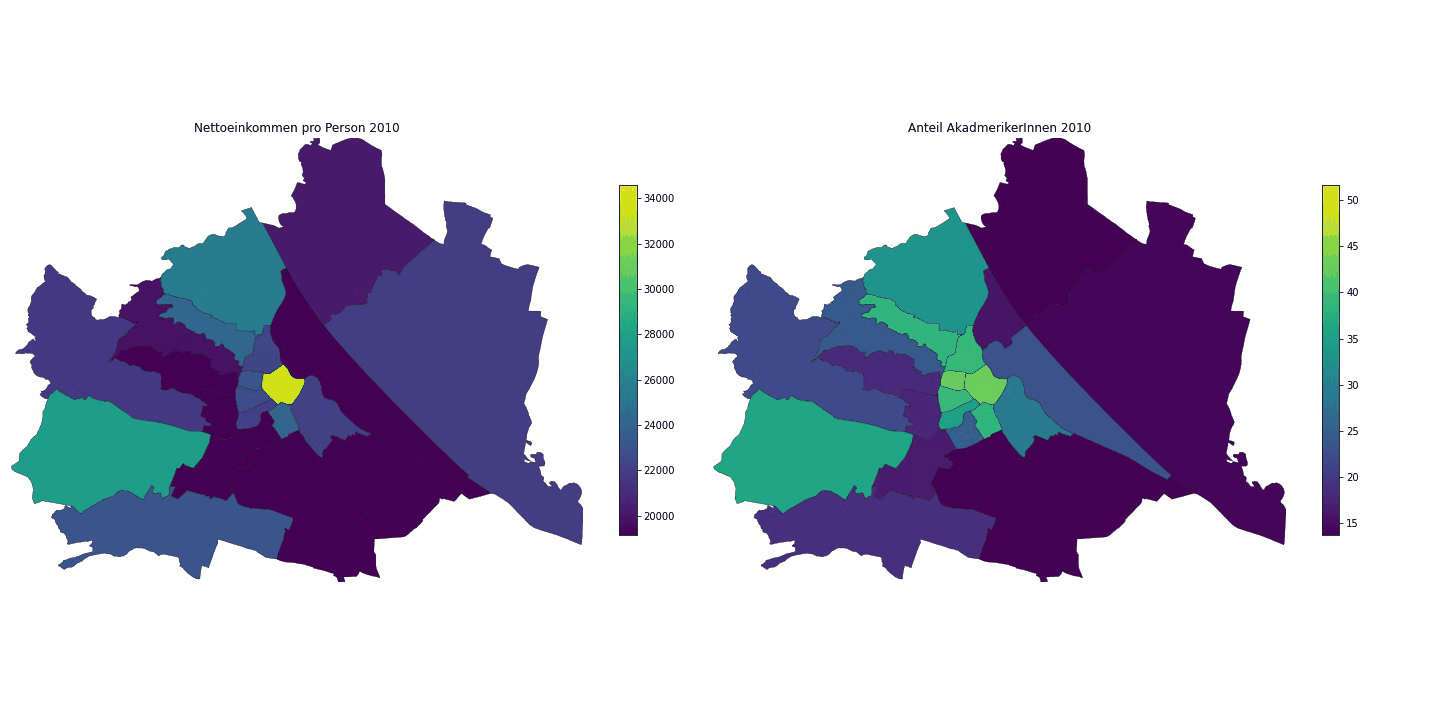

In [ ]:
# Animation der Bilder
filenames = ['geoplot_vienna_{}.jpg'.format(jahr) for jahr in jahre]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('animated_geoplot.gif', images, duration=2)

Image(open('animated_geoplot.gif','rb').read())